In [1]:
import os
import pathlib
import pandas as pd
from sklearn.metrics import classification_report
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0"; 

In [2]:
!pip install ktrain
import ktrain
from ktrain import text

     |████████████████████████████████| 25.2 MB 5.0 MB/s 
     |████████████████████████████████| 981 kB 44.5 MB/s 
     |████████████████████████████████| 241 kB 46.9 MB/s 
     |████████████████████████████████| 3.3 MB 38.1 MB/s 
     |████████████████████████████████| 468 kB 47.2 MB/s 
  Created wheel for ktrain: filename=ktrain-0.14.7-py3-none-any.whl size=25240972 sha256=f8dbe678fed9583ab80ef777e773475b2c426341e83afe41680732cf971c9c6e
  Stored in directory: /root/.cache/pip/wheels/d5/f8/64/c482e2e11303d04d85af01b9b94ecfbeff8620be8f6e543e5f
  Created wheel for keras-bert: filename=keras_bert-0.81.0-py3-none-any.whl size=37912 sha256=8b1b84aa583874f1598c4b7fe5910a29bd253b4b8218c8604fc94315b968f4c0
  Stored in directory: /root/.cache/pip/wheels/fc/f6/94/9c54242cde921a3cdc7d049bae3f137d21fa28d3b8ccefd8a0
  Created wheel for langdetect: filename=langdetect-1.0.8-py3-none-any.whl size=993191 sha256=3d7276487f7df018a7499449eb2522f804bd6a7754fdf6f5dcda6de6bce4a425
  Stored in directory: /

In [3]:
#check if the paths for the input data is valid.
train_path="../Train.csv"
test_path="../Test.csv"
tr_path= pathlib.Path(train_path)
te_path=pathlib.Path(test_path)
if tr_path.exists ():
    print("Train data path set.")
else: 
    raise SystemExit("Train data path does not exist.")
     
if te_path.exists ():
    print("Test data path set.")
else: 
    raise SystemExit("Test data path does not exist.")

Train data path set.
Test data path set.


In [4]:
#showing the first 5 lines of the train data
train_df=pd.read_csv(train_path, encoding='utf-16', sep=';', header=None).values
#train_df.head()

,0,1,2
0,t1,negative,"Vineet, what you are trying to do is a terribl..."
1,t2,positive,"'Course I do, corrected."
2,t3,positive,"Excellent, happy to help! If you don't mind, c..."
3,t6,negative,@talnicolas I'm using it a few dozen times in ...
4,t7,neutral,I didn't select an answer because even though ...


In [5]:
#showing the first 5 lines of the test data
test_df=pd.read_csv(test_path, encoding='utf-16', sep=';', header=None).values
#test_df.head()

,0,1,2
0,t4,positive,@DrabJay: excellent suggestion! Code changed. :-)
1,t5,neutral,Any decent browser should protect against mali...
2,t8,negative,I swear - I don't put pseudo code I get told o...
3,t9,neutral,I have attached below
4,t13,negative,When I refactor the following line: using Resh...


In [6]:
(x_train, y_train), (x_test, y_test), preproc =  text.texts_from_array(train_df[:,2], train_df[:,1],  x_test=test_df[:,2], y_test=test_df[:,1], 
                                                                     maxlen=500, preprocess_mode='bert')
                                                                     
                  

task: text regression (supply class_names argument if this is supposed to be classification task)
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


preprocessing test...
language: en


In [7]:
model = text.text_classifier('bert', (x_train, y_train) , preproc=preproc)

Is Multi-Label? False
maxlen is 500
done.


In [8]:
learner = ktrain.get_learner(model, 
                             train_data=(x_train, y_train), 
                             val_data=(x_test, y_test), 
                             batch_size=6)

In [9]:
learner.lr_find()

simulating training for different learning rates... this may take a few moments...
Train on 3097 samples
Epoch 1/1024
3097/3097 [==============================] - 432s 139ms/sample - loss: 1.0226 - accuracy: 0.5283
Epoch 2/1024
3097/3097 [==============================] - 410s 132ms/sample - loss: 0.8086 - accuracy: 0.6261
Epoch 3/1024
 174/3097 [>.............................] - ETA: 6:32 - loss: 1.9264 - accuracy: 0.4195

done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


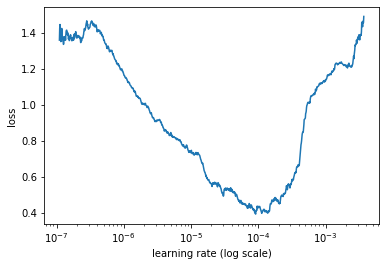

In [10]:
learner.lr_plot()

In [11]:
# 2e-5 is one of the LRs  recommended by Google and is consistent with the plot above.
learner.autofit(2e-5, early_stopping=5)

reduce_on_plateau automatically enabled at patience=2


begin training using triangular learning rate policy with max lr of 2e-05...
Train on 3097 samples, validate on 1326 samples
Epoch 1/1024
3097/3097 [==============================] - 448s 145ms/sample - loss: 0.5546 - accuracy: 0.7704 - val_loss: 0.3151 - val_accuracy: 0.8801
Epoch 2/1024
3097/3097 [==============================] - 444s 143ms/sample - loss: 0.2507 - accuracy: 0.9102 - val_loss: 0.3081 - val_accuracy: 0.8861
Epoch 3/1024
3097/3097 [==============================] - 443s 143ms/sample - loss: 0.1348 - accuracy: 0.9558 - val_loss: 0.3447 - val_accuracy: 0.8884
Epoch 4/1024
3096/3097 [============================>.] - ETA: 0s - loss: 0.0792 - accuracy: 0.9748
Epoch 00004: Reducing Max LR on Plateau: new max lr will be 1e-05 (if not early_stopping).
3097/3097 [==============================] - 446s 144ms/sample - loss: 0.0791 - accuracy: 0.9748 - val_loss: 0.4069 - val_accuracy: 0.8831
Epoch 5/1024
3097/3097 [=========

In [12]:
model.save("model.h5")

Let's make some predictions on new data.

In [13]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [14]:
data=test_df[:,2].tolist()
label=test_df[:,1].tolist()


In [15]:
i=0
correct=0
wrong=0
total=len(data)
true_lab=[]
pred_lab=[]
text=[]
for dt in data:
    result=predictor.predict(dt)
    if not result== label[i]:
        text.append(dt)
        pred_lab.append(result)
        true_lab.append(label[i])
        wrong+=1
    else:
        correct+=1
    
    i+=1

name_dict = {
            'Name': text,
            'Gold Label' : true_lab,
            'Predicted Label': pred_lab
          }

wrong_data= pd.DataFrame(name_dict)

wrong_data.to_csv("wrong_results.csv", sep=';')




In [16]:
names = ['negative', 'neutral', 'positive']
y_pred = predictor.predict(data)
y_true= test_df[1]
print(classification_report(y_true, y_pred, target_names=names))

              precision    recall  f1-score   support

    negative       0.86      0.86      0.86       360
     neutral       0.86      0.85      0.86       508
    positive       0.93      0.94      0.94       458

    accuracy                           0.89      1326
   macro avg       0.88      0.89      0.88      1326
weighted avg       0.89      0.89      0.89      1326



In [17]:
print("Correct: ", correct,"/",total,"\nWrong: ", wrong,"/",total)

Correct:  1175 / 1326 
Wrong:  151 / 1326
